In [132]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import time
import pathlib
import numpy as np
import pandas as pd

In [133]:
def get_image_bounds(directory, bounds):
    output = []
    for i in os.listdir(directory):
        if '.DS_Store' in i:
            continue
        for k, j in enumerate(os.listdir(directory + '/' + i)):
            if k >= bounds:
                continue
            output.append((f'{directory}/{i}/{j}', i))
    return pd.DataFrame(output, columns=['filename', 'class'])

training = {}
sizes = [100, 150, 200, 250, 300]

for i in range(5):
    path = '/Users/kilometers/Documents/GitHub/CS534/hw7/dataset/'

    directory = get_image_bounds(path, sizes[i]/2)

    model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
      tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu', padding="same"),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(4096, activation='relu'),
      tf.keras.layers.Dense(output_class_units, activation='softmax')
    ])

    BATCH_SIZE = 3
    IMG_HEIGHT = 227
    IMG_WIDTH = 227

    image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    train_data_gen = image_generator.flow_from_dataframe(dataframe=directory,
                                                         batch_size=BATCH_SIZE,
                                                         shuffle=True,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH))

    model.compile(optimizer='sgd', loss="categorical_crossentropy", metrics=['accuracy', 'mean_squared_error'])

    model.summary()

    training[str(sizes[i])] = model.fit(train_data_gen, steps_per_epoch=2, epochs=100)

Found 100 validated image filenames belonging to 2 classes.
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_170 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_170 (Ba  (None, 55, 55, 96)       384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_171 (Conv2D)         (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_171 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                         

2/2 [==============================] - 2s 915ms/step - loss: 0.0885 - accuracy: 1.0000 - mean_squared_error: 0.0231
Epoch 41/100
2/2 [==============================] - 2s 865ms/step - loss: 0.3155 - accuracy: 0.8333 - mean_squared_error: 0.1199
Epoch 42/100
2/2 [==============================] - 2s 860ms/step - loss: 0.0614 - accuracy: 1.0000 - mean_squared_error: 0.0126
Epoch 43/100
2/2 [==============================] - 2s 867ms/step - loss: 0.5242 - accuracy: 0.8333 - mean_squared_error: 0.1714
Epoch 44/100
2/2 [==============================] - 2s 837ms/step - loss: 0.2109 - accuracy: 0.8333 - mean_squared_error: 0.0760
Epoch 45/100
2/2 [==============================] - 2s 848ms/step - loss: 0.0620 - accuracy: 1.0000 - mean_squared_error: 0.0072
Epoch 46/100
2/2 [==============================] - 2s 856ms/step - loss: 0.1549 - accuracy: 0.8333 - mean_squared_error: 0.0592 
Epoch 47/100
2/2 [==============================] - 2s 820ms/step - loss: 1.4227 - accuracy: 0.8333 - mean_sq

 conv2d_175 (Conv2D)         (None, 55, 55, 96)        34944     
                                                                 
 batch_normalization_175 (Ba  (None, 55, 55, 96)       384       
 tchNormalization)                                               
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_176 (Conv2D)         (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_176 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
                                                                 
 conv2d_177 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_nor

2/2 [==============================] - 2s 852ms/step - loss: 0.8566 - accuracy: 0.8333 - mean_squared_error: 0.1669
Epoch 43/100
2/2 [==============================] - 2s 837ms/step - loss: 0.0139 - accuracy: 1.0000 - mean_squared_error: 9.3013e-04
Epoch 44/100
2/2 [==============================] - 2s 831ms/step - loss: 0.0074 - accuracy: 1.0000 - mean_squared_error: 1.1635e-04
Epoch 45/100
2/2 [==============================] - 2s 768ms/step - loss: 0.4131 - accuracy: 0.8333 - mean_squared_error: 0.1560
Epoch 46/100
2/2 [==============================] - 2s 843ms/step - loss: 0.0077 - accuracy: 1.0000 - mean_squared_error: 3.0004e-04
Epoch 47/100
2/2 [==============================] - 2s 820ms/step - loss: 3.6585 - accuracy: 0.6667 - mean_squared_error: 0.3517
Epoch 48/100
2/2 [==============================] - 2s 834ms/step - loss: 0.0030 - accuracy: 1.0000 - mean_squared_error: 2.3920e-05
Epoch 49/100
2/2 [==============================] - 2s 859ms/step - loss: 0.0175 - accuracy: 1

                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 27, 27, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_181 (Conv2D)         (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_181 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
                                                                 
 conv2d_182 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_182 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_183 (Conv2D)         (None, 27, 27, 384)       1327488   
          

2/2 [==============================] - 2s 817ms/step - loss: 0.1372 - accuracy: 1.0000 - mean_squared_error: 0.0364
Epoch 45/100
2/2 [==============================] - 2s 821ms/step - loss: 0.7402 - accuracy: 0.6000 - mean_squared_error: 0.2816
Epoch 46/100
2/2 [==============================] - 2s 822ms/step - loss: 0.6181 - accuracy: 0.8333 - mean_squared_error: 0.1769
Epoch 47/100
2/2 [==============================] - 2s 833ms/step - loss: 0.4126 - accuracy: 0.8333 - mean_squared_error: 0.1391
Epoch 48/100
2/2 [==============================] - 2s 849ms/step - loss: 1.3775 - accuracy: 0.6667 - mean_squared_error: 0.3311
Epoch 49/100
2/2 [==============================] - 2s 836ms/step - loss: 0.3768 - accuracy: 0.8333 - mean_squared_error: 0.1305
Epoch 50/100
2/2 [==============================] - 2s 829ms/step - loss: 0.5469 - accuracy: 0.5000 - mean_squared_error: 0.2087
Epoch 51/100
2/2 [==============================] - 2s 821ms/step - loss: 0.4504 - accuracy: 0.6667 - mean_squ

 conv2d_186 (Conv2D)         (None, 27, 27, 256)       2973952   
                                                                 
 batch_normalization_186 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
                                                                 
 conv2d_187 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_187 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_188 (Conv2D)         (None, 27, 27, 384)       1327488   
                                                                 
 batch_normalization_188 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_18

2/2 [==============================] - 2s 736ms/step - loss: 0.1779 - accuracy: 0.8333 - mean_squared_error: 0.0698
Epoch 47/100
2/2 [==============================] - 2s 819ms/step - loss: 0.5301 - accuracy: 0.8333 - mean_squared_error: 0.1528
Epoch 48/100
2/2 [==============================] - 2s 870ms/step - loss: 0.1598 - accuracy: 1.0000 - mean_squared_error: 0.0498
Epoch 49/100
2/2 [==============================] - 2s 817ms/step - loss: 0.1090 - accuracy: 1.0000 - mean_squared_error: 0.0302
Epoch 50/100
2/2 [==============================] - 2s 747ms/step - loss: 0.0038 - accuracy: 1.0000 - mean_squared_error: 5.2294e-05
Epoch 51/100
2/2 [==============================] - 2s 859ms/step - loss: 0.0498 - accuracy: 1.0000 - mean_squared_error: 0.0055
Epoch 52/100
2/2 [==============================] - 2s 837ms/step - loss: 0.0067 - accuracy: 1.0000 - mean_squared_error: 1.0417e-04
Epoch 53/100
2/2 [==============================] - 2s 805ms/step - loss: 0.2119 - accuracy: 0.8333 - 

 conv2d_192 (Conv2D)         (None, 27, 27, 384)       885120    
                                                                 
 batch_normalization_192 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_193 (Conv2D)         (None, 27, 27, 384)       1327488   
                                                                 
 batch_normalization_193 (Ba  (None, 27, 27, 384)      1536      
 tchNormalization)                                               
                                                                 
 conv2d_194 (Conv2D)         (None, 27, 27, 256)       884992    
                                                                 
 batch_normalization_194 (Ba  (None, 27, 27, 256)      1024      
 tchNormalization)                                               
                                                                 
 max_pooli

2/2 [==============================] - 2s 817ms/step - loss: 0.0609 - accuracy: 1.0000 - mean_squared_error: 0.0138
Epoch 50/100
2/2 [==============================] - 2s 814ms/step - loss: 0.0575 - accuracy: 1.0000 - mean_squared_error: 0.0062
Epoch 51/100
2/2 [==============================] - 2s 846ms/step - loss: 0.1293 - accuracy: 0.8333 - mean_squared_error: 0.0478
Epoch 52/100
2/2 [==============================] - 2s 808ms/step - loss: 0.1956 - accuracy: 0.8333 - mean_squared_error: 0.0665
Epoch 53/100
2/2 [==============================] - 2s 813ms/step - loss: 0.0528 - accuracy: 1.0000 - mean_squared_error: 0.0073
Epoch 54/100
2/2 [==============================] - 2s 839ms/step - loss: 0.0825 - accuracy: 1.0000 - mean_squared_error: 0.0235
Epoch 55/100
2/2 [==============================] - 2s 830ms/step - loss: 0.2512 - accuracy: 0.8333 - mean_squared_error: 0.0847
Epoch 56/100
2/2 [==============================] - 2s 800ms/step - loss: 0.5937 - accuracy: 0.6667 - mean_squ

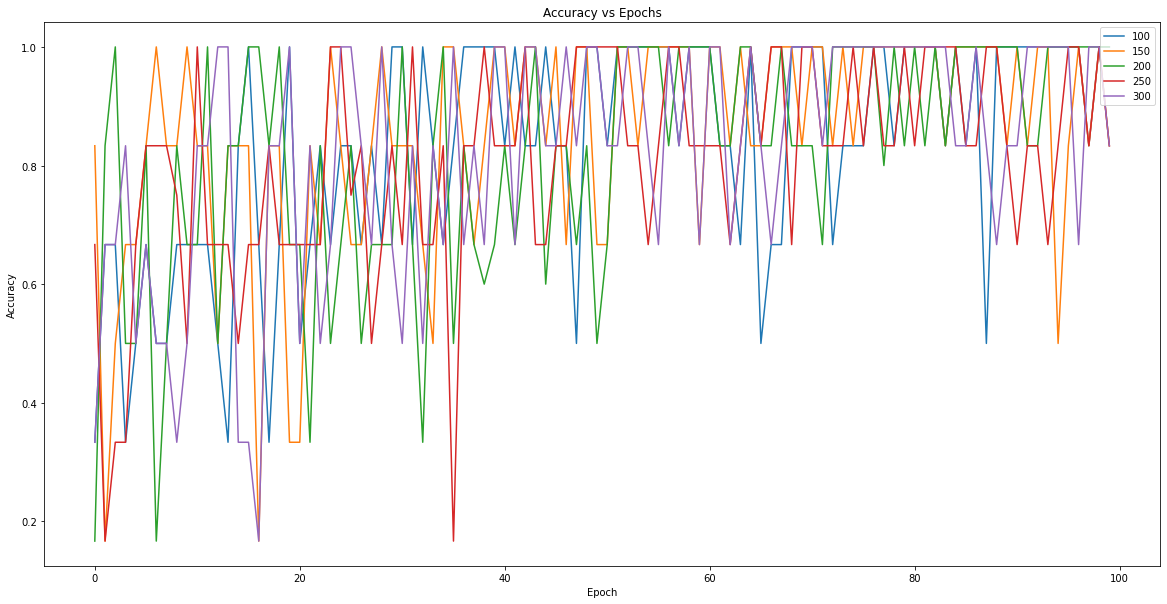

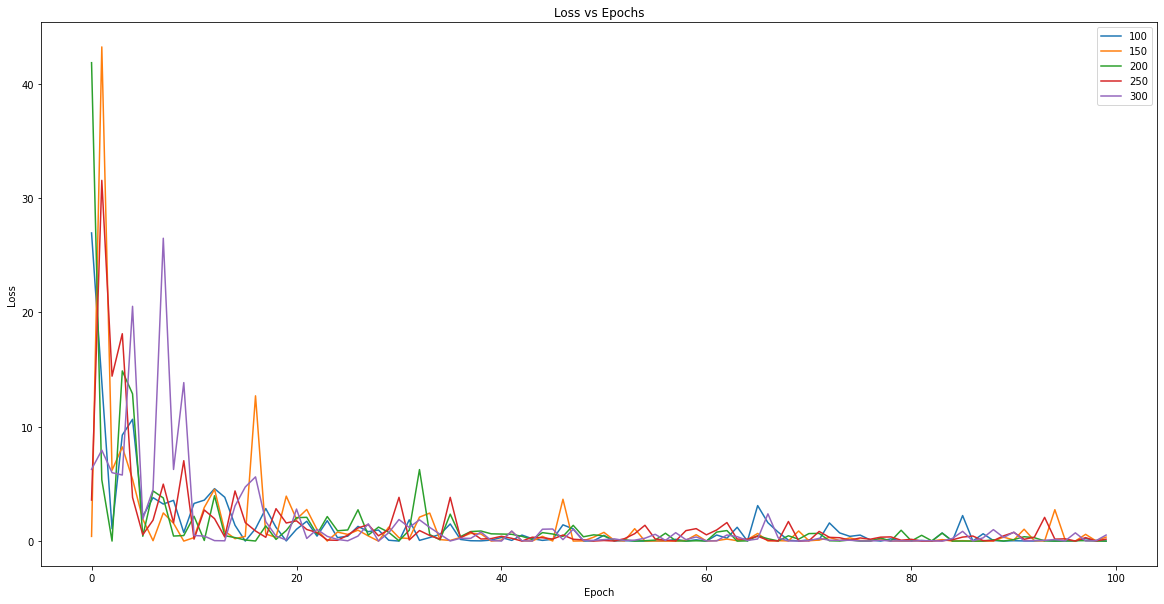

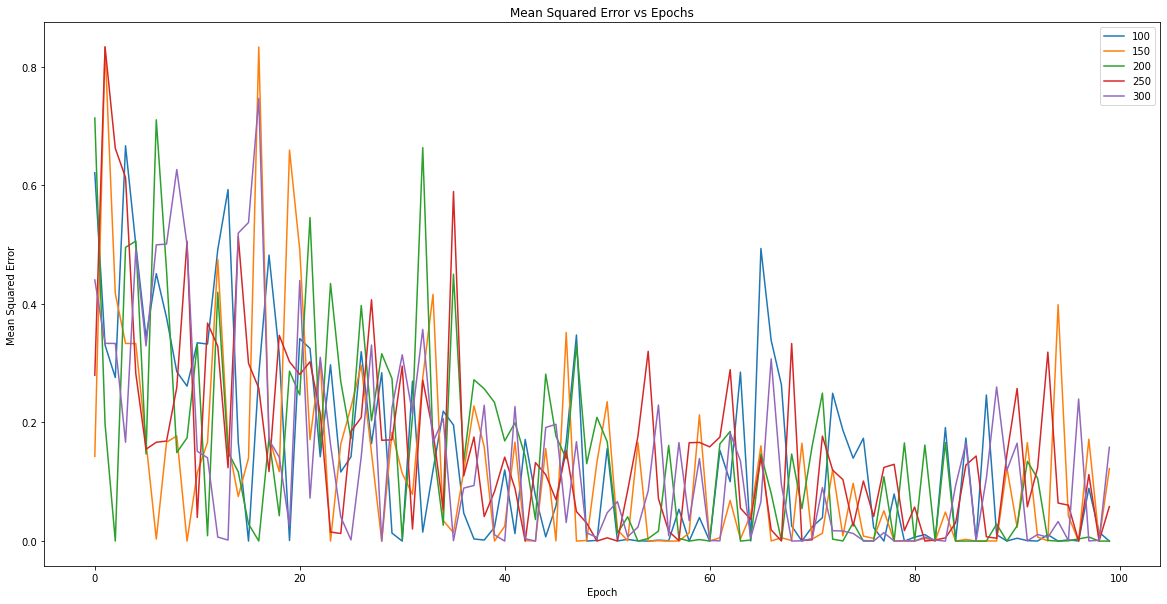

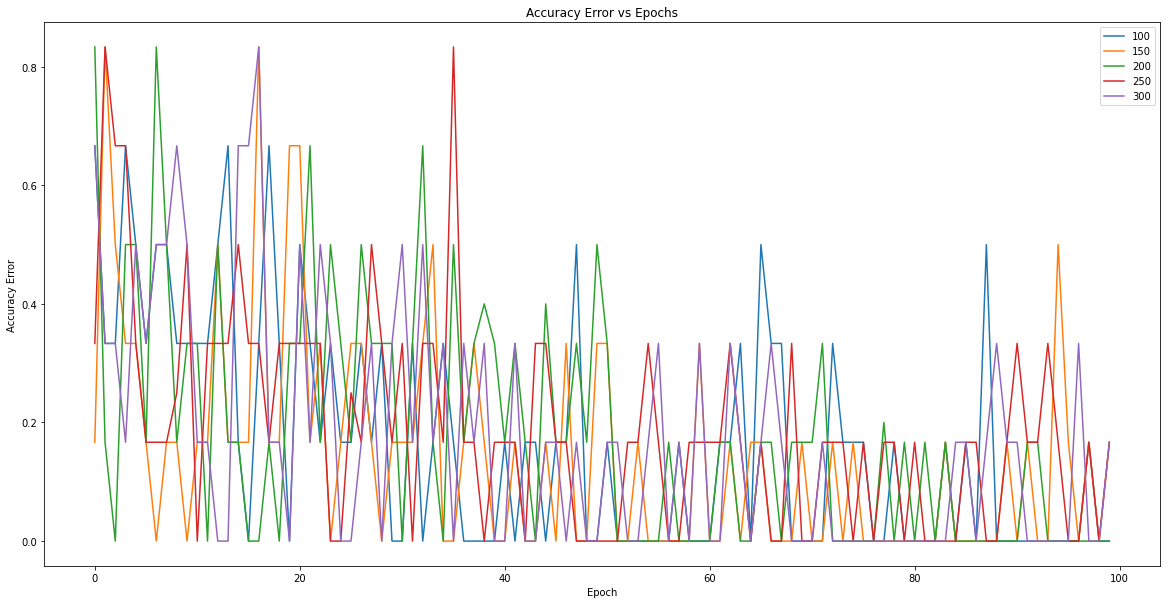

In [134]:
plt.rcParams['figure.figsize'] = [20, 10]

# PLOT 1
plt.plot(training['100'].history['accuracy'], label='100')
plt.plot(training['150'].history['accuracy'], label='150')
plt.plot(training['200'].history['accuracy'], label='200')
plt.plot(training['250'].history['accuracy'], label='250')
plt.plot(training['300'].history['accuracy'], label='300')

plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 2
plt.plot(training['100'].history['loss'], label='100')
plt.plot(training['150'].history['loss'], label='150')
plt.plot(training['200'].history['loss'], label='200')
plt.plot(training['250'].history['loss'], label='250')
plt.plot(training['300'].history['loss'], label='300')

plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 3
plt.plot(training['100'].history['mean_squared_error'], label='100')
plt.plot(training['150'].history['mean_squared_error'], label='150')
plt.plot(training['200'].history['mean_squared_error'], label='200')
plt.plot(training['250'].history['mean_squared_error'], label='250')
plt.plot(training['300'].history['mean_squared_error'], label='300')

plt.title('Mean Squared Error vs Epochs')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()

# PLOT 4
plt.plot([1-i for i in training['100'].history['accuracy']], label='100')
plt.plot([1-i for i in training['150'].history['accuracy']], label='150')
plt.plot([1-i for i in training['200'].history['accuracy']], label='200')
plt.plot([1-i for i in training['250'].history['accuracy']], label='250')
plt.plot([1-i for i in training['300'].history['accuracy']], label='300')

plt.title('Accuracy Error vs Epochs')
plt.ylabel('Accuracy Error')
plt.xlabel('Epoch')
plt.legend(loc='upper right')


plt.show()